   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  
0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int32
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64


C:\Users\alish\AppData\Local\Temp\ipykernel_19464\390808384.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


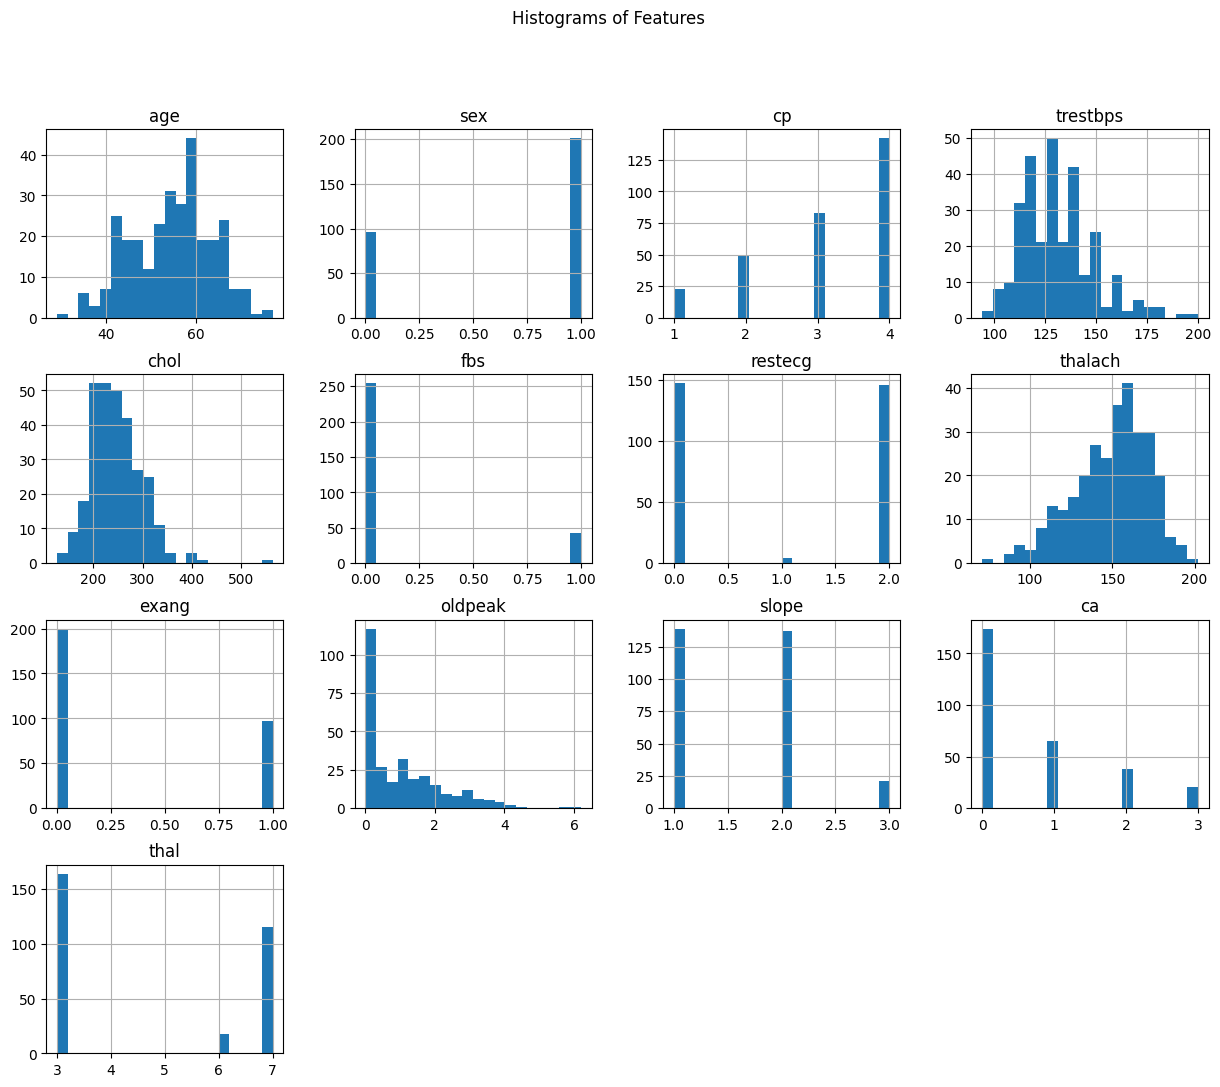

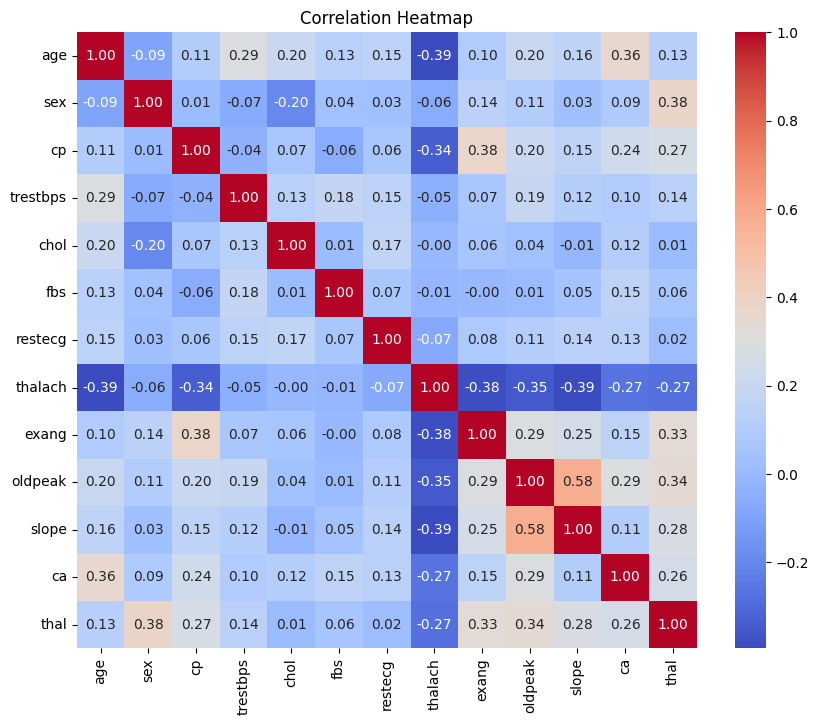

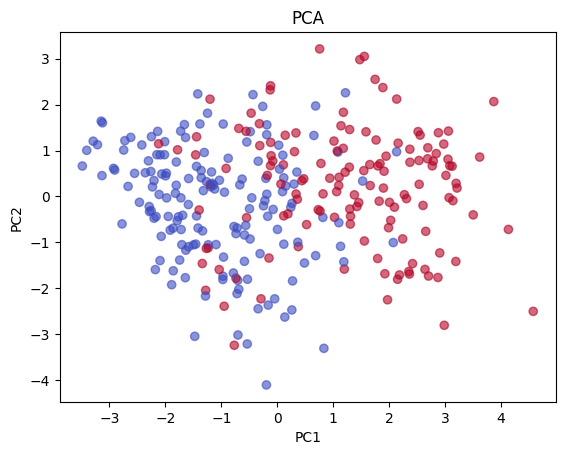

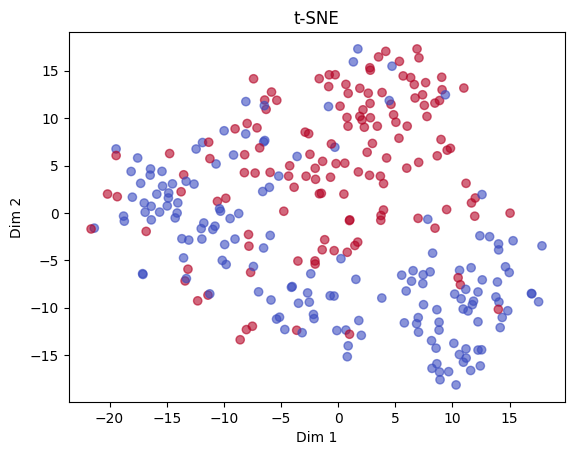

C:\Users\alish\miniconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


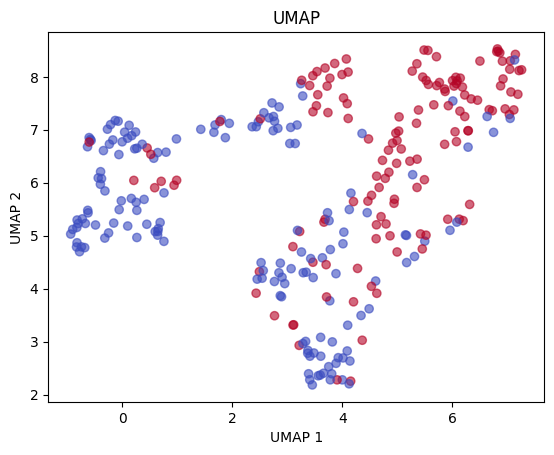

Tuning RandomForest...
RandomForest Accuracy: 0.8333
Confusion Matrix:
[[30  2]
 [ 8 20]]
Tuning KNN...
KNN Accuracy: 0.8667
Confusion Matrix:
[[29  3]
 [ 5 23]]
Tuning LogisticRegression...


C:\Users\alish\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\alish\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


LogisticRegression Accuracy: 0.8667
Confusion Matrix:
[[30  2]
 [ 6 22]]
Tuning Gradientboosting...
Gradientboosting Accuracy: 0.8000
Confusion Matrix:
[[28  4]
 [ 8 20]]


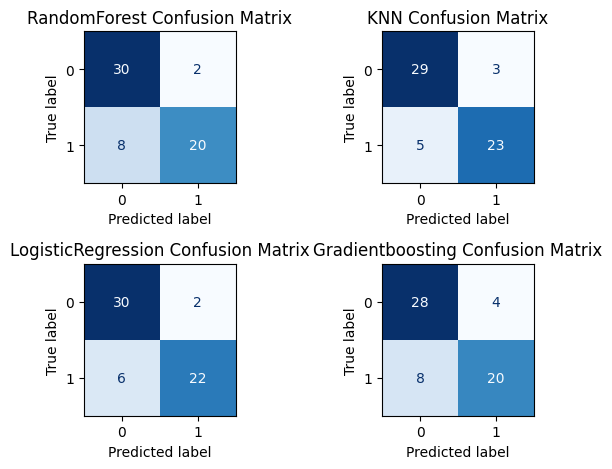


Best Model: KNN with Accuracy: 0.8667


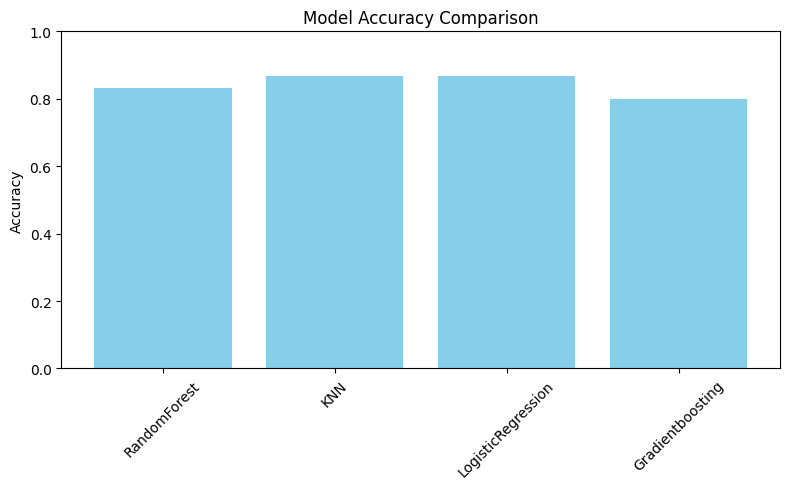

✅ Saved KNN as 'best_model.pkl'


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import shap

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 1. Load Dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

# Binary classification: convert target to 0/1
y = (y['num'] > 0).astype(int)

print(X.head())
print(y.head())

# 2. Preprocessing
print(X.isnull().sum())
X.dropna(inplace=True)
y = y.loc[X.index]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. EDA
display(X.describe())
X.hist(figsize=(15, 12), bins=20)
plt.suptitle("Histograms of Features")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_scaled, columns=X.columns).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 4. Dimensionality Reduction

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.values.ravel(), cmap="coolwarm", alpha=0.6)
plt.title("PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.values.ravel(), cmap="coolwarm", alpha=0.6)
plt.title("t-SNE")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

# UMAP
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_scaled)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y.values.ravel(), cmap="coolwarm", alpha=0.6)
plt.title("UMAP")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

# 5. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 6. Models & Hyperparameters
models = {
    "RandomForest": (RandomForestClassifier(), {
        'n_estimators': [50, 100, 150],
        'max_depth': [4, 6, 8, None]
    }),
    "KNN": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9]
    }),
    "LogisticRegression": (LogisticRegression(max_iter=1000), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "Gradientboosting": (GradientBoostingClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    })
}

best_models = {}
accuracies = {}

# 7. Hyperparameter Tuning + Evaluation
for i, (name, (model, params)) in enumerate(models.items(),1):
    print(f"Tuning {name}...")
    clf = RandomizedSearchCV(model, params, cv=5, n_iter=10, scoring="accuracy", random_state=42, n_jobs=-1)
    clf.fit(X_train, y_train)
    best_models[name] = clf.best_estimator_
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Plotting Confusion Matrix
    plt.subplot(2, 2, i)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap='Blues', ax=plt.gca(), colorbar=False)
    plt.title(f"{name} Confusion Matrix")

plt.tight_layout()
plt.savefig("all_models_confusion_matrices.png")
plt.show()
    
# 8. Best Model
best_model_name = max(accuracies, key=accuracies.get)
print(f"\nBest Model: {best_model_name} with Accuracy: {accuracies[best_model_name]:.4f}")

# 9. Accuracy Comparison Plot
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color="skyblue")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Save best model and results
import pickle

with open("best_model.pkl", "wb") as f:
    pickle.dump(best_models[best_model_name], f)
print(f"✅ Saved {best_model_name} as 'best_model.pkl'")

pd.DataFrame.from_dict(accuracies, orient='index', columns=['Accuracy']).to_csv("model_accuracies.csv")

